In [64]:
import datetime
import operator
from functools import partial

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['figure.figsize'] = [16., 9.]

In [3]:
dtypes_dict = {"M"+str(key):np.float32 for key in range(1,9)}
dtypes_dict["DaysToExp"] = np.int32
dataframe = pd.read_csv("data/VIX Futures min.csv", usecols=[0] + list(range(2,10)) + [11],
                        index_col=0, dtype=dtypes_dict, parse_dates=[0])

In [4]:
dataframe = dataframe.loc["2006-10-25 12:19:00":"2017-06-16"]

In [5]:
dataframe = dataframe.dropna(how="any")

In [6]:
cond = (dataframe.index + datetime.timedelta(days=1)).isin(dataframe.index)
useful_indices = dataframe.index.where(cond).dropna()
this_term = dataframe.loc[useful_indices,"M1":"M8"]
next_term = dataframe.loc[useful_indices + datetime.timedelta(days=1),"M1":"M8"]

In [7]:
assert this_term.dropna(how="all").shape == this_term.shape
assert next_term.dropna(how="all").shape == next_term.shape
assert this_term.shape == next_term.shape

In [8]:
this_term

,M1,M2,M3,M4,M5,M6,M7,M8
time,,,,,,,,
2007-10-24 15:02:00,21.860001,21.600,21.620001,21.600000,22.080,21.590,21.700001,21.920000
2007-10-24 15:03:00,21.860001,21.600,21.620001,21.600000,22.080,21.590,21.700001,21.920000
2007-10-24 15:04:00,21.860001,21.600,21.620001,21.600000,22.080,21.590,21.700001,21.920000
2007-10-24 15:05:00,21.860001,21.590,21.620001,21.600000,22.080,21.590,21.700001,21.920000
2007-10-24 15:06:00,21.790001,21.600,21.620001,21.600000,22.080,21.590,21.700001,21.920000
2007-10-24 15:07:00,21.799999,21.590,21.620001,21.600000,22.080,21.590,21.700001,21.920000
2007-10-24 15:08:00,21.770000,21.520,21.620001,21.600000,22.080,21.590,21.700001,21.920000
2007-10-24 15:09:00,21.840000,21.520,21.620001,21.600000,22.080,21.590,21.700001,21.920000
2007-10-24 15:10:00,21.850000,21.520,21.620001,21.600000,22.080,21.590,21.700001,21.920000


In [9]:
next_term

,M1,M2,M3,M4,M5,M6,M7,M8
time,,,,,,,,
2007-10-25 15:02:00,21.799999,21.770000,21.600000,21.809999,21.770,21.590,21.770000,21.770000
2007-10-25 15:03:00,21.799999,21.770000,21.600000,21.809999,21.770,21.590,21.770000,21.770000
2007-10-25 15:04:00,21.799999,21.770000,21.600000,21.809999,21.770,21.590,21.770000,21.770000
2007-10-25 15:05:00,21.799999,21.770000,21.600000,21.809999,21.770,21.590,21.770000,21.770000
2007-10-25 15:06:00,21.799999,21.770000,21.600000,21.809999,21.770,21.590,21.770000,21.770000
2007-10-25 15:07:00,21.799999,21.770000,21.620001,21.809999,21.770,21.590,21.770000,21.770000
2007-10-25 15:08:00,21.750000,21.770000,21.620001,21.809999,21.770,21.590,21.770000,21.770000
2007-10-25 15:09:00,21.750000,21.770000,21.620001,21.809999,21.770,21.590,21.770000,21.770000
2007-10-25 15:10:00,21.719999,21.709999,21.620001,21.809999,21.770,21.590,21.770000,21.770000


In [10]:
print("Naive MSE:", np.nanmean(np.square(next_term.values - this_term.values)))

Naive MSE: 0.530347


In [11]:
this_final = this_term.diff(axis=1).iloc[:,1:].join(this_term.iloc[:,0]).iloc[:,range(-1,7)]
this_final = this_final.join(dataframe["DaysToExp"])

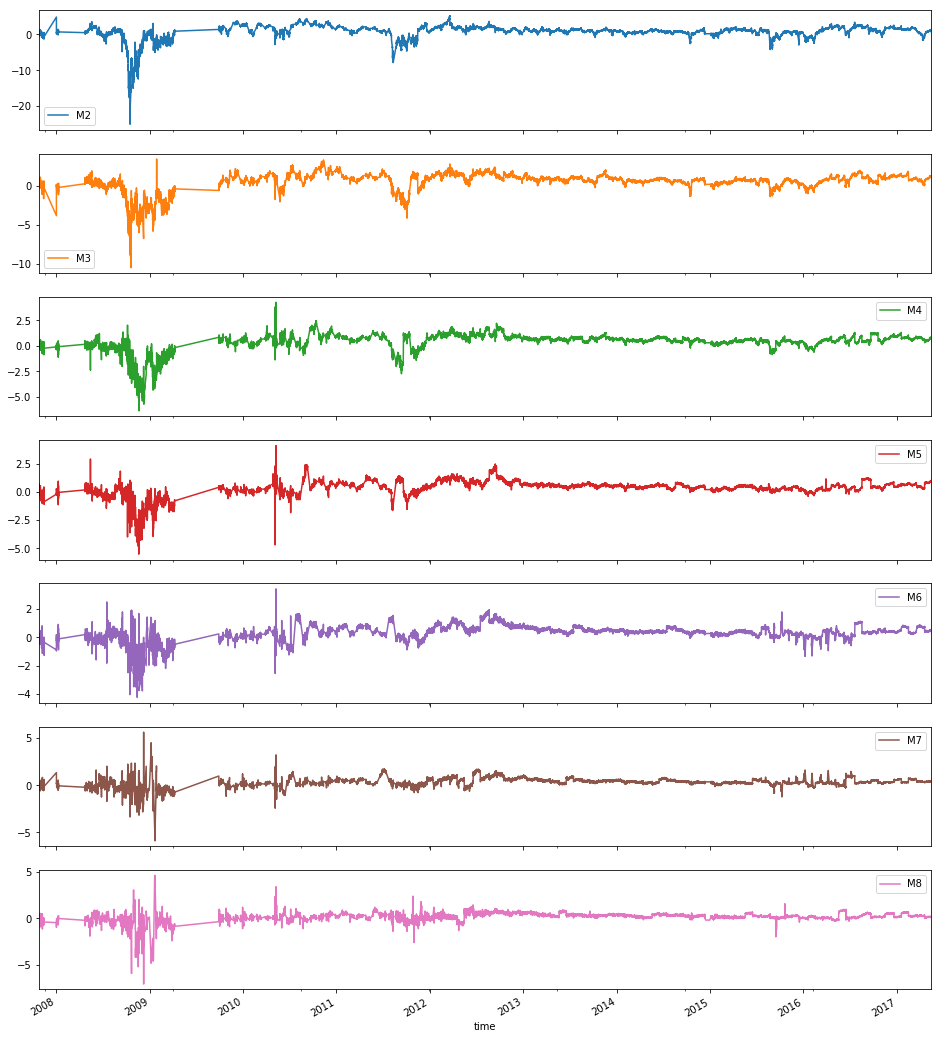

In [12]:
this_final.loc[:,"M2":"M8"].plot(figsize=(16,20), subplots=True)
plt.show()

In [13]:
def calculate_long_prices(term: pd.Series):
        longs = [2*term[i] - term[i-1] - term[i+1] for i in range(1, len(term)-1)]
        return pd.Series(longs, term[1:-1].index)
next_final = next_term.apply(calculate_long_prices, axis=1)

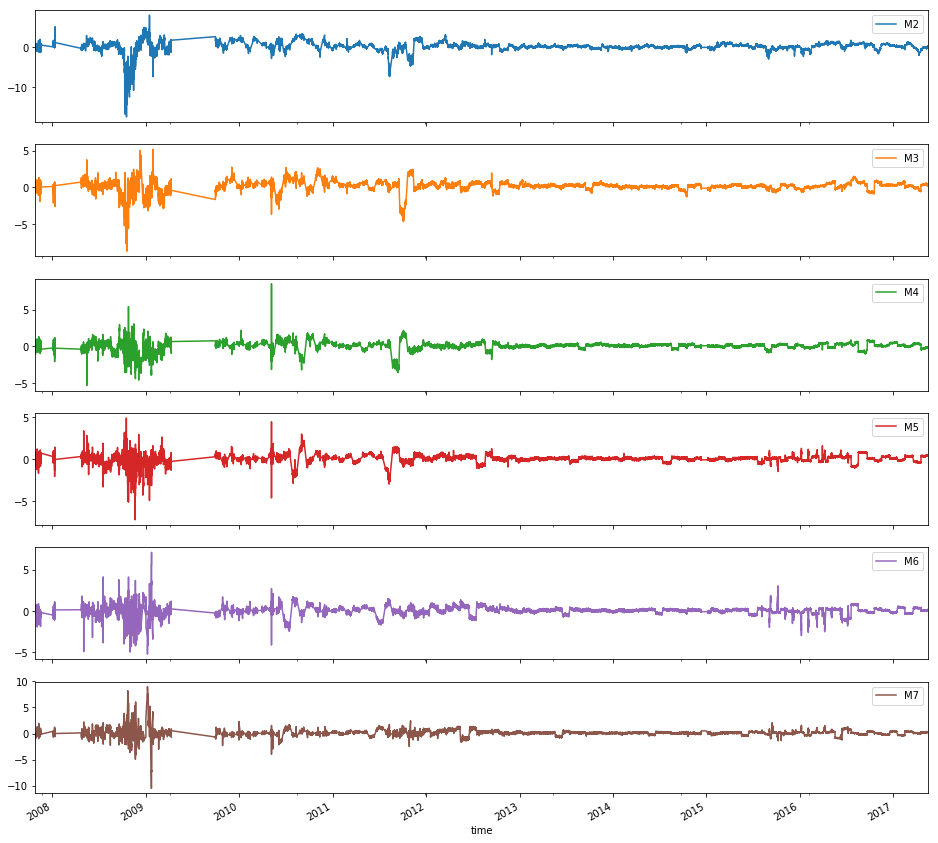

In [14]:
next_final.plot(figsize=(16,16), subplots=True)
plt.show()

In [91]:
# this_final.to_hdf("data/term_structure_minutely.hdf5", "x", complevel=9, complib="bzip2")
# next_final.to_hdf("data/term_structure_minutely.hdf5", "y", complevel=9, complib="bzip2")

In [45]:
# Maybe better plot all this
threshold = 0.5
for i in range(2,8):
    column = "M"+str(i)
    from2010 = next_final.loc["2010":][column]
    count = from2010[from2010 > threshold].shape[0]
    print("{}: {} ({:.2f})".format(column, count, count / from2010.shape[0]))

M2: 163690 (0.30)
M3: 116072 (0.21)
M4: 52264 (0.09)
M5: 49759 (0.09)
M6: 50787 (0.09)
M7: 56781 (0.10)


In [83]:
def threshold_func(data, column, threshold):
    data = data[column]
    count = data[data > threshold].shape[0] + data[data < -threshold].shape[0]
    return count / data.shape[0]

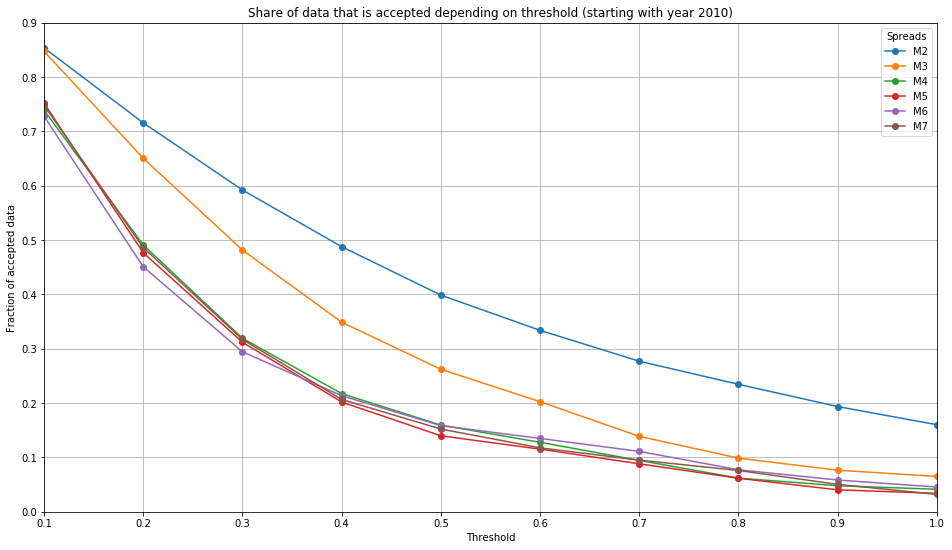

In [88]:
for column in next_final.columns:
    x = np.linspace(0.1, 1, 10)
    partial_threshold = partial(threshold_func, next_final.loc["2010":], column)
    y = tuple(map(partial_threshold, x))
    plt.plot(x, y, "o-", label=column)
    plt.legend(title="Spreads")
plt.title("Share of data that is accepted depending on threshold (starting with year 2010)")
plt.xlabel("Threshold")
plt.ylabel("Fraction of accepted data")
plt.grid()
plt.ylim(0, 0.9)
plt.xlim(0.1, 1)
plt.show()